# Extend Emissions

Create four extensions for any NaN part, i.e. if the pathway ends in 2018 or 2030, then follow 
* Use past rate to inform future
    * If last year 2018: Apply the same last ten years growth/decline rate to the future up to 2030, then constant. 
    * If last year 2030: Apply the 2020-2030 growth/decline rate to the future up to 2050. 

* Use the SSP1BL growth rate from 2030 to 2050
* [NOT USED] Use the SSP5BL growth rate from 2030 to 2050 
* Keep 2018/2030 emission levels constant. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import os
import scmdata.database
import pandas as pd
import numpy as np

from ndcs.constants import PROCESSED_DATA_DIR, RAW_DATA_DIR, NDC_TARGET_RELEASE

<IPython.core.display.Javascript object>

/home/jared/miniconda3/envs/ndc-realisations-2021/lib/python3.9/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
DATABASE_DIR = os.path.join(PROCESSED_DATA_DIR, "country_emissions", NDC_TARGET_RELEASE)
DATABASE_DIR

'/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../data/processed/country_emissions/12Nov2021a_CR'

<IPython.core.display.Javascript object>

In [5]:
db = scmdata.database.ScmDatabase(DATABASE_DIR, levels=("region", "variable"))
db

<scmdata.database.SCMDatabase (root_dir: /home/jared/code/cr/ndc-realisations-2021/src/ndcs/../data/processed/country_emissions/12Nov2021a_CR, levels: ('region', 'variable'))>

<IPython.core.display.Javascript object>

## Load country emissions

In [6]:
raw_emms = db.load(variable=["Emissions|Total GHG*"])
len(raw_emms.get_unique_meta("region"))

Loading files:   0%|          | 0/396 [00:00<?, ?it/s]

198

<IPython.core.display.Javascript object>

In [7]:
raw_emms

<scmdata.ScmRun (timeseries: 5144, timepoints: 81)>
Time:
	Start: 1980-01-01T00:00:00
	End: 2060-01-01T00:00:00
Meta:
	     ambition conditionality exclude_hot_air          model region        scenario submission_date        unit                          variable
	0        high              C         exclude  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	1        high              R         exclude  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	2        high              U         exclude  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	3        high              C         include  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	4        high              R         include  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	5    

<IPython.core.display.Javascript object>

In [8]:
baseline_emms = raw_emms.filter(scenario=["SSP1BL", "SSP5BL"])
raw_emms = raw_emms.filter(scenario=["SSP1BL", "SSP5BL"], keep=False)

<IPython.core.display.Javascript object>

In [9]:
baseline_emms.filter(region="USA").timeseries(time_axis="year")

time                                                                                                                      1980         1981         1982         1983         1984         1985        1986  ...          2054          2055  \
ambition conditionality exclude_hot_air model       region scenario submission_date unit      variable                                                                                                       ...                               
NaN      NaN            NaN             unspecified USA    SSP1BL   NaN             Mt CO2/yr Emissions|Total GHG  6657.218063  6439.458594  6076.526145  6097.265142  6315.024611  6273.546617  6252.80762  ...   5091.423784   5060.315288   
                                                           SSP5BL   NaN             Mt CO2/yr Emissions|Total GHG  6657.218063  6439.458594  6076.526145  6097.265142  6315.024611  6273.546617  6252.80762  ...  12236.008278  12443.398249   

time                                                                                                                       2056          2057          2058          2059          2060  
ambition conditionality exclude_hot_air model       region scenario submission_date unit      variable                                                                                   
NaN      NaN            NaN             unspecified USA    SSP1BL   NaN             Mt CO2/yr Emissions|Total GHG   5018.837294   4977.359300   4935.881306   4894.403311   4852.925317  
                                                           SSP5BL   NaN             Mt CO2/yr Emissions|Total GHG  12650.788220  12858.178191  13065.568162  13272.958133  13480.348103  

[2 rows x 81 columns]

<IPython.core.display.Javascript object>

In [10]:
raw_emms_usa = raw_emms.filter(region="NRU")
raw_emms_usa.timeseries(time_axis="year", drop_all_nan_times=True)

time                                                                                                                                        1990     1991     1992     1993     1994    1995     1996  ...     2044     2045     2046     2047     2048  \
ambition conditionality exclude_hot_air model         region scenario       submission_date unit       variable                                                                                        ...                                                
high     C              exclude         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         R              exclude         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         U              exclude         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         C              include         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         R              include         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         U              include         NDC Factsheet NRU    HighNDC        10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         C              exclude         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
         R              exclude         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
         U              exclude         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
         C              include         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
         R              include         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
         U              include         NDC Factsheet NRU    HighInitialNDC 4/7/2016        Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...      NaN      NaN      NaN      NaN      NaN   
low      C              exclude         NDC Factsheet NRU    LowNDC         10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02124  0.01718   
         R              exclude         NDC Factsheet NRU    LowNDC         10/14/2021      Mt CO2 /yr Emissions|Total GHG excl. LULUCF  0.13412  0.13446  0.13108  0.12404  0.12048  0.1164  0.11232  ...  0.03343  0.02937  0.02531  0.02

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CO2 /yr'>

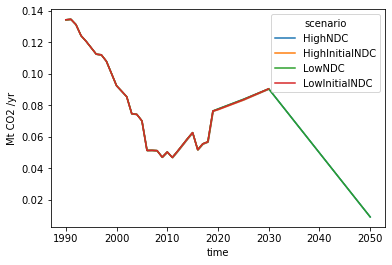

<IPython.core.display.Javascript object>

In [11]:
raw_emms_usa.lineplot()

<AxesSubplot:xlabel='time', ylabel='Mt CO2/yr'>

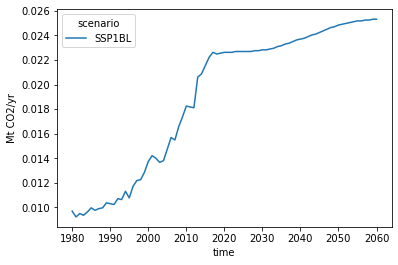

<IPython.core.display.Javascript object>

In [12]:
baseline_emms.filter(region="TUV", scenario="SSP1BL").lineplot()

In [13]:
# We have 6 pathways for 2 submissions = 12 in total

<IPython.core.display.Javascript object>

## Extensions

In [14]:
# Helper functions
def determine_last_year(ts):
    argmax = (~pd.isna(ts)[::-1]).argmax()
    argmax = len(ts) - argmax - 1

    #     argmax = argmax if argmax < len(ts) else argmax
    return ts.index[argmax]


def growth_rate_abs(ts, y_past, y_present):
    # Get the growth rate of a time series
    # Doesn't do any smoothing
    v_past = ts.loc[y_past]
    v_present = ts.loc[y_present]

    gr = v_present - v_past
    gr = gr / (y_present - y_past)

    return gr


def growth_rate_pct(ts, y_past, y_present):
    # Get the growth rate of a time series
    # Doesn't do any smoothing
    v_past = ts.loc[y_past]
    v_present = ts.loc[y_present]

    gr = (v_present - v_past) / v_past
    gr = gr / (y_present - y_past)

    return gr


growth_rate = growth_rate_pct

<IPython.core.display.Javascript object>

In [15]:
determine_last_year(raw_emms.timeseries(time_axis="year").iloc[0])

2030

<IPython.core.display.Javascript object>

In [16]:
# Augment the results with the year which emissions finish
raw_emms["last_provided_year"] = raw_emms.timeseries(time_axis="year").apply(
    determine_last_year, axis=1
)
raw_emms.get_unique_meta("last_provided_year")

[2030, 2050, 2049]

<IPython.core.display.Javascript object>

In [17]:
raw_emms

<scmdata.ScmRun (timeseries: 4748, timepoints: 81)>
Time:
	Start: 1980-01-01T00:00:00
	End: 2060-01-01T00:00:00
Meta:
	     ambition conditionality exclude_hot_air  last_provided_year          model region        scenario submission_date        unit                          variable
	0        high              C         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	1        high              R         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	2        high              U         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	3        high              C         include                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	4        high              R         include       

<IPython.core.display.Javascript object>

In [18]:
region_meta_idx = raw_emms.meta.columns.get_loc("region")
region_meta_idx

5

<IPython.core.display.Javascript object>

In [19]:
raw_emms.filter(region="TUV").timeseries()

time                                                                                                                                                        1980-01-01  1981-01-01  1982-01-01  1983-01-01  1984-01-01  1985-01-01  1986-01-01  ...  \
ambition conditionality exclude_hot_air last_provided_year model         region scenario       submission_date unit       variable                                                                                                              ...   
high     C              exclude         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         R              exclude         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         U              exclude         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         C              include         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         R              include         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         U              include         2030               NDC Factsheet TUV    HighInitialNDC 4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         C              exclude         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         R              exclude         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         U              exclude         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         C              include         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         R              include         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         U              include         2050               NDC Factsheet TUV    HighNDC        NOT YET         Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
low      C              exclude         2030               NDC Factsheet TUV    LowInitialNDC  4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         R              exclude         2030               NDC Factsheet TUV    LowInitialNDC  4/22/2016       Mt CO2 /yr Emissions|Total GHG excl. LULUCF         NaN         NaN         NaN         NaN         NaN         NaN         NaN  ...   
         U              exclude         2030    

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CO2 /yr'>

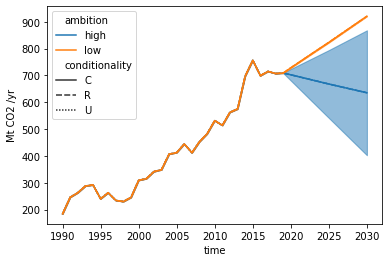

<IPython.core.display.Javascript object>

In [20]:
# Extract a single timeseries for testing
test_item = raw_emms.filter(region="SAU").timeseries(time_axis="year").iloc[0]
raw_emms.filter(region="SAU").lineplot(hue="ambition", style="conditionality")

### Extend past

Use past rate to inform future
* If last year 2018: Apply the same last ten years growth/decline rate to the future up to 2030, then constant. 
* If last year 2030: Apply the 2020-2030 growth/decline rate to the future up to 2050. 


In [21]:
growth_rate(test_item, 2020, 2030)

-0.03656028992907761

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time'>

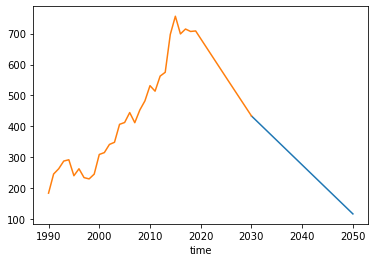

<IPython.core.display.Javascript object>

In [22]:
def extend_past(ts: pd.Series):
    # Using
    ts = ts.copy()
    last_year = determine_last_year(ts)

    if last_year == 2018:
        gr = growth_rate(ts, 2008, 2018)
        # Growth rate till 2030
        for y in range(last_year + 1, 2030 + 1):
            ts.loc[y] = ts.loc[y - 1] + gr

        # Then constant
        for y in range(2031, 2050 + 1):
            ts.loc[y] = ts.loc[y - 1]
    elif last_year >= 2030:
        gr = growth_rate(ts, 2020, 2030)
        # Growth rate till 2050
        delta = ts.loc[last_year] * gr
        for y in range(last_year + 1, 2050 + 1):
            ts.loc[y] = ts.loc[y - 1] + delta
    else:
        raise ValueError("Unknown last year for {}. {}".format(ts, last_year))

    return ts


extend_past(test_item).loc[2030:].plot()
test_item.plot()

In [23]:
test_item

time
1980   NaN
1981   NaN
1982   NaN
1983   NaN
1984   NaN
1985   NaN
1986   NaN
1987   NaN
1988   NaN
1989   NaN
        ..
2051   NaN
2052   NaN
2053   NaN
2054   NaN
2055   NaN
2056   NaN
2057   NaN
2058   NaN
2059   NaN
2060   NaN
Name: (high, C, exclude, 2030, NDC Factsheet, SAU, HighNDC, 10/23/2021, Mt CO2 /yr, Emissions|Total GHG excl. LULUCF), Length: 81, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
# Check that the first derivative is constant
extend_past(test_item).diff().loc[2015:2035]

time
2015    58.915590
2016   -57.245270
2017    15.879190
2018    -7.905160
2019     1.693680
2020   -25.116200
2021   -25.063420
2022   -25.063430
2023   -25.063420
2024   -25.063430
2025   -25.063420
2026   -24.920310
2027   -24.920310
2028   -24.920310
2029   -24.920320
2030   -24.920310
2031   -15.854769
2032   -15.854769
2033   -15.854769
2034   -15.854769
2035   -15.854769
Name: (high, C, exclude, 2030, NDC Factsheet, SAU, HighNDC, 10/23/2021, Mt CO2 /yr, Emissions|Total GHG excl. LULUCF), dtype: float64

<IPython.core.display.Javascript object>

### Constant
Keep 2018/2030 emission levels constant. 

<AxesSubplot:xlabel='time'>

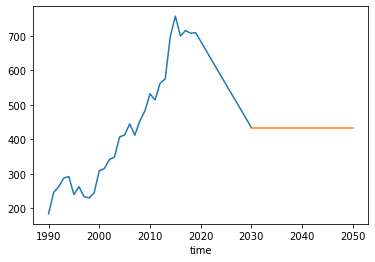

<IPython.core.display.Javascript object>

In [25]:
def extend_constant(ts: pd.Series):
    # Using
    ts = ts.copy()
    last_year = determine_last_year(ts)

    # Keep constant
    for y in range(last_year + 1, 2050 + 1):
        ts.loc[y] = ts.loc[y - 1]

    return ts


test_item.plot()
extend_constant(test_item).loc[2030:].plot()

### SSP Growth rate

* Use the SSP1BL growth rate from 2030 to 2050
* Use the SSP5BL growth rate from 2030 to 2050 

<AxesSubplot:xlabel='time'>

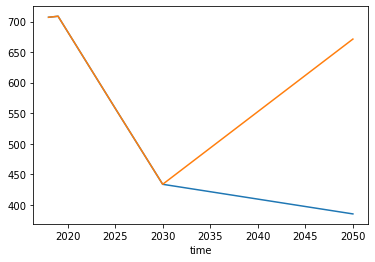

<IPython.core.display.Javascript object>

In [26]:
def extend_spp(ts: pd.Series, scenario):
    # Using
    ts = ts.copy()
    last_year = determine_last_year(ts)
    region = ts.name[region_meta_idx]
    baseline_region_emms = baseline_emms.filter(
        region=region, scenario=scenario, log_if_empty=False
    )
    if baseline_region_emms.empty:
        # if baseline scenario doesn't exist assume constant
        return extend_constant(ts)

    baseline_region_emms_ts = baseline_region_emms.timeseries(time_axis="year").iloc[0]

    gr = growth_rate(baseline_region_emms_ts, 2030, 2050)
    delta = ts.loc[last_year] * gr

    # Growth rate till 2050
    for y in range(last_year + 1, 2050 + 1):
        ts.loc[y] = ts.loc[y - 1] + delta

    return ts


def extend_ssp1bl(ts):
    return extend_spp(ts, "SSP1BL")


def extend_ssp5bl(ts):
    return extend_spp(ts, "SSP5BL")


extend_ssp1bl(test_item).loc[2018:].plot()
extend_ssp5bl(test_item).loc[2018:].plot()

<AxesSubplot:xlabel='time', ylabel='Mt CO2/yr'>

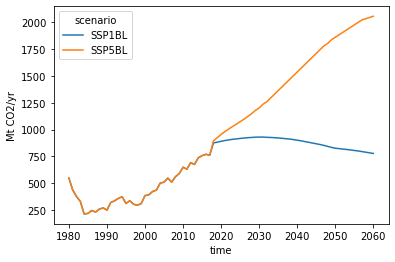

<IPython.core.display.Javascript object>

In [27]:
baseline_emms.filter(region="SAU").lineplot()

In [28]:
extend_ssp1bl(test_item)

time
1980   NaN
1981   NaN
1982   NaN
1983   NaN
1984   NaN
1985   NaN
1986   NaN
1987   NaN
1988   NaN
1989   NaN
        ..
2051   NaN
2052   NaN
2053   NaN
2054   NaN
2055   NaN
2056   NaN
2057   NaN
2058   NaN
2059   NaN
2060   NaN
Name: (high, C, exclude, 2030, NDC Factsheet, SAU, HighNDC, 10/23/2021, Mt CO2 /yr, Emissions|Total GHG excl. LULUCF), Length: 81, dtype: float64

<IPython.core.display.Javascript object>

In [29]:
baseline_region_emms = baseline_emms.filter(region="USA", scenario="SSP5BL")

<IPython.core.display.Javascript object>

In [30]:
baseline_region_emms.timeseries(time_axis="year").iloc[0]

time
1980     6657.218063
1981     6439.458594
1982     6076.526145
1983     6097.265142
1984     6315.024611
1985     6273.546617
1986     6252.807620
1987     6470.567090
1988     6719.435055
1989     6802.391043
            ...     
2051    11613.838366
2052    11821.228337
2053    12028.618308
2054    12236.008278
2055    12443.398249
2056    12650.788220
2057    12858.178191
2058    13065.568162
2059    13272.958133
2060    13480.348103
Name: (nan, nan, nan, unspecified, USA, SSP5BL, nan, Mt CO2/yr, Emissions|Total GHG), Length: 81, dtype: float64

<IPython.core.display.Javascript object>

In [31]:
growth_rate(
    baseline_region_emms.timeseries(time_axis="year").iloc[0] / 1000, 2030, 2050
)

0.02060333761232349

<IPython.core.display.Javascript object>

# Clip to 2030

In [32]:
def extend_2030(ts: pd.Series):
    # Using
    ts = ts.copy()
    # Growth rate till 2050
    for y in range(2030 + 1, 2050 + 1):
        ts.loc[y] = np.nan

    return ts

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time'>

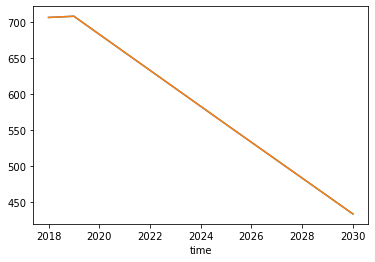

<IPython.core.display.Javascript object>

In [33]:
test_item.loc[2018:].plot()
extend_2030(test_item).loc[2018:].plot()

## Bring it all together

In [34]:
# We have 4 different extension methods.

extensions = [
    (extend_past, "Emissions|Total GHG excl. LULUCF|Rate", "rate"),
    (extend_ssp1bl, "Emissions|Total GHG excl. LULUCF|SSP1BL", "SSP1BL"),
    (extend_ssp5bl, "Emissions|Total GHG excl. LULUCF|SSP5BL", "SSP5BL"),
    (extend_constant, "Emissions|Total GHG excl. LULUCF|Constant", "constant"),
    (extend_2030, "Emissions|Total GHG excl. LULUCF|2030", "2030"),
]

def apply_extension(emms, f, variable_name, method_name):
    emms_extend = emms.timeseries(time_axis="year").copy().T.apply(f)
    emms_extend = scmdata.ScmRun(emms_extend.T)
    emms_extend["variable"] = variable_name
    emms_extend["country_extension"] = method_name
    return emms_extend


<IPython.core.display.Javascript object>

In [35]:
len(raw_emms.get_unique_meta("region"))

198

<IPython.core.display.Javascript object>

In [36]:
# Run the extensions
emms_extended = scmdata.run_append(
    [apply_extension(raw_emms, *ext) for ext in extensions]
)
emms_extended = scmdata.ScmRun(emms_extended.timeseries(drop_all_nan_times=True))
emms_extended

<scmdata.ScmRun (timeseries: 23740, timepoints: 61)>
Time:
	Start: 1990-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	      ambition conditionality country_extension exclude_hot_air  last_provided_year          model region        scenario submission_date        unit                               variable
	0         high              C              rate         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF|Rate
	1         high              R              rate         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF|Rate
	2         high              U              rate         exclude                2030  NDC Factsheet    TUV  HighInitialNDC       4/22/2016  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF|Rate
	3         high              C              rate         include                2030  NDC Factsheet    TUV  HighInitialND

<IPython.core.display.Javascript object>

In [37]:
db.save(emms_extended)

Saving to database: 0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CO2 /yr'>

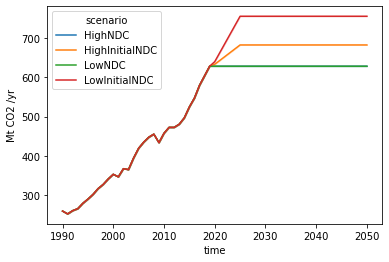

<IPython.core.display.Javascript object>

In [38]:
emms_extended.filter(region="ZZA").lineplot()

# Load previous version

In [ ]:
# DATABASE_DIR = os.path.join(PROCESSED_DATA_DIR, "country_emissions", "2Nov2021a_CR")
# DATABASE_DIR

In [ ]:
# db_old = scmdata.database.ScmDatabase(DATABASE_DIR, levels=("region", "variable"))
# db_old

In [ ]:
# db_old.load(region="ZZA", variable="Emissions|Total|GHG excl. LULUCF|*")

In [ ]:
# db_old.load().lineplot()